In [111]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# get all file names
chordPath  = '/Users/aaronlevi/Documents/Insight2020/chordRec/chords/'
chordFiles = [f for f in listdir(chordPath) if isfile(join(chordPath, f))]

chordFiles.remove('.DS_Store')

In [113]:
# put together a list of various standard major & minor chords
sl1 = ['A', 'Bb', 'B', 'C', 'C#', 'Db', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'G#', 'Ab' ]
sl2 = [s + 'maj' for s in sl1]
sl3 = [s + 'm' for s in sl1]
sl4 = [s + 'min' for s in sl1]

standardList = sl1+sl2+sl3+sl4

In [114]:
# load each song csv, get some metrics
nUniqueChords = []
nHardChords   = []

for iSong in range(0, len(chordFiles)):
#     dfSong = pd.read_csv(chordPath+chordFiles[iSong])
    dfSong = pd.read_csv(chordPath+chordFiles[iSong], sep='delimiter', header=None)

    if dfSong.size==4:
        uniqChords = dfSong[0][2].split(',')[1:]
        nUniqueChords.append(len(uniqChords))
    
        tmpHard = []
        for kCh in range(0, nUniqueChords[iSong]):
            tmpHard.append(uniqChords[kCh] in standardList)
    
        nHardChords.append(sum(tmpHard));
#     else:  #### THIS IS A PROBLEM RIGHT NOW-- ADDING ZEROS AS A QUICK HACK TO KEEP ON TRUCKING
#         print('Something went wrong with ' +chordFiles[iSong])
#         nUniqueChords.append(0)
#         nHardChords.append(0)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


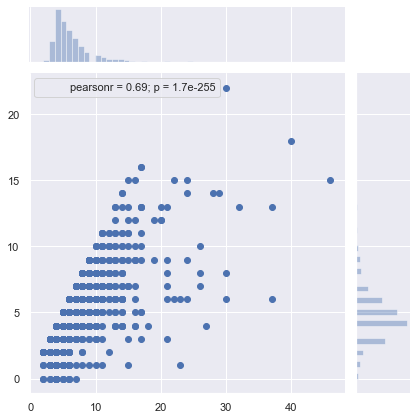

In [132]:
import scipy.stats as stats

sns.set(style="darkgrid", color_codes=True)
h = sns.jointplot(nUniqueChords, nHardChords)
h.annotate(stats.pearsonr)
plt.show()


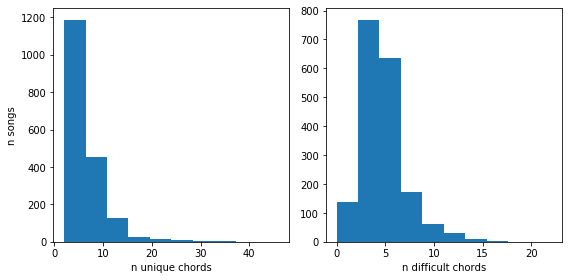

In [131]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

ax[0].hist(nUniqueChords)
ax[0].set_xlabel('n unique chords')
ax[0].set_ylabel('n songs')

ax[1].hist(nHardChords)
ax[1].set_xlabel('n difficult chords')

plt.tight_layout()

In [135]:
[np.median(nUniqueChords), np.median(nHardChords)]

[5.0, 5.0]